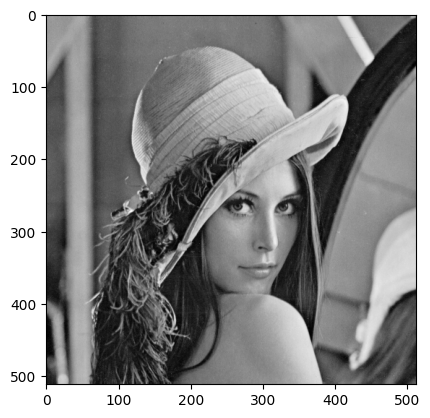

In [1]:
### AUTHOR
# jacopo iacovacci 2019

### LIBRARIES
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
import networkx as nx


# import image
M = imread("lena512.tiff", as_gray=True)
M = M.astype(float) 
plt.imshow(M,cmap="gray")
plt.show()

In [2]:
# horizontal image visibility algorithm
n_rows=M.shape[0]
n_columns=M.shape[1]

edge_list=list()

for i in range(0,n_rows):    
    for j in range(0,n_columns):
  
    
####### first neighbors        
        if j < n_columns-1:  
            #print([n_columns*i+j,n_columns*i+j+1])
            edge_list.append([n_columns*i+j,n_columns*i+j+1])
               
        if i < n_rows-1 and j < n_columns-1:
            #print([n_columns*i+j,n_columns*(i+1)+j+1])
            edge_list.append([n_columns*i+j,n_columns*(i+1)+j+1])
      
        if i < n_rows-1:
            #print([n_columns*i+j,n_columns*(i+1)+j])
            edge_list.append([n_columns*i+j,n_columns*(i+1)+j])
    
        if i < n_rows-1 and j > 0 :
            #print([n_columns*i+j,n_columns*(i+1)+j-1])
            edge_list.append([n_columns*i+j,n_columns*(i+1)+j-1])

####### visibility

    # along column  
        if i < n_rows-2:            
            k=i+1;            
            for r in range(i+2,n_rows):
                cond=1                
                for l in range(k,r):                      
                    if M[l,j] >= M[i,j] or M[l,j] >= M[r,j]:
                        cond=0
                        k=l
                        break
                if M[l,j] >= M[i,j]:
                    break
                               
                if cond==1:
                    edge_list.append([n_columns*i+j,n_columns*r+j])             

 
   # along row
    
        if j < n_columns-2:            
            k=j+1;           
            for c in range(j+2,n_columns):
                cond=1           
                for l in range(k,c): 
                    if M[i,l] >= M[i,j] or M[i,l] >= M[i,c]:
                        cond=0
                        k=l
                        break      
                if M[i,l] >= M[i,j]:
                     break
                                 
                if cond==1:      
                     edge_list.append([n_columns*i+j,n_columns*i+c])



    # along diag 1   
        if j < n_columns-2 and i < n_rows-2:
            
            kj=j+1;
            ki=i+1;
            diag_lenght=min(n_rows-1-i,n_columns-1-j)            
            r=ki
            
            for c in range(j+2,j+diag_lenght+1):                
                r=r+1                
                cond=1                
                li=ki-1
                
                for lj in range(kj,c):                    
                    li=li+1
                    
                    if M[li,lj] >= M[i,j] or M[li,lj] >= M[r,c]:
                        cond=0
                        ki=li
                        kj=lj
                        break
                
                if M[li,lj] >= M[i,j]:
                    break
                
                if cond==1:
                    edge_list.append([n_columns*i+j,n_columns*r+c])
    
    
        
       # along diag 2 
        if  j > 1 and i < n_rows-2:
            
            kj=j-1
            ki=i+1
            
            diag_lenght=min(n_rows-1-i,j)         
            c=kj
            
            for r in range(i+2,i+diag_lenght+1):
                
                c=c-1
                cond=1
                
                lj=kj+1
                
                for li in range(ki,r):
                    
                    lj=lj-1
                    
                    if M[li,lj] >= M[i,j] or M[li,lj] >= M[r,c]:
                        cond=0
                        ki=li
                        kj=lj
                        break
                
                if M[li,lj] >= M[i,j]:
                    break
                                
                if cond==1:                   
                    edge_list.append([n_columns*i+j,n_columns*r+c])


print("done")                    
                    

done


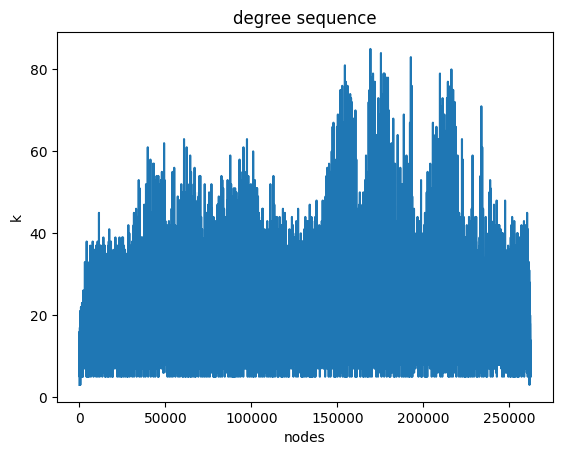

In [3]:
# plot degree sequence of image visibility graph
edge_list=pd.DataFrame(edge_list)

deg_seq=np.zeros(M.shape[0]*M.shape[1])

for d in edge_list.loc[:,0]:
        deg_seq[d] += 1
for d in edge_list.loc[:,1]:
        deg_seq[d] += 1
        
plt.plot(deg_seq)  
plt.title("degree sequence")
plt.xlabel("nodes")
plt.ylabel("k")
plt.show() 

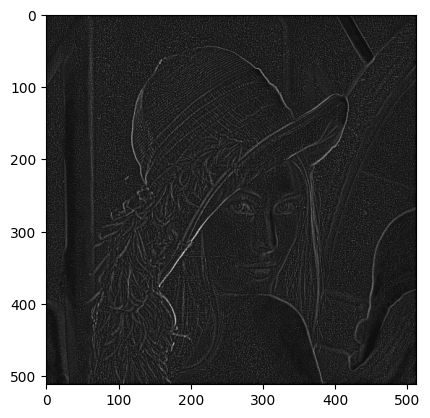

In [4]:
# apply degree filter to original image
kfiltered_M=np.reshape(np.array(deg_seq),(M.shape[0],M.shape[1]))
plt.imshow(kfiltered_M,cmap="gray")
plt.show()

In [5]:
# save degree sequence
with open('deg_seq_ihvg_notebook.txt','a') as f:
    for element in deg_seq:
        f.write("%s\n" % element)